In [20]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST("", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

train_set = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
test_set = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [21]:
#more like object orientated programming
import torch.nn as nn
#Specific Functions - interchangable with tourch.nn
import torch.nn.functional as F


super corresponds to nn module, running the initilization for nn.Module. When you inherit, you inherit methods and attributes but the initialisation is not run if you want initialisation method to run of your parent class that you are inheriting from you have to run super init
fc1 = 1st fully connected layer
nnLinear(input, output) -> 
nnLinear - fully connected
   if convolutional neural networks - nnconv
we cant pass image -> flatted image with view. Pixels will be in rows
input is flattened images -> 28*28
making 3 layers of 64 neurons for hidden layers
therefore output = 6 or whatever we want
output- 10 classes - output layer only has 10 neurons

definining path for data to take through these layers
feed-forward neural network - data passes in one direction from one side to another

data won't be scaled properly without activation function
F.relu - recified linear -> running activation function over entire layer
    whether or not the neruon is firing like human brain
    most activation function is sigmoid (ranges from 0 - 1)
    it keeps the outputs of these layers from exploding
    can still occur when calculating losses / gradients
    activation function runs on the output side of the neuron
    output layer - we only want one of the neruons to fully fire
        - want a probability distribution on the output
        - F log solve max for multi class classification problem
            - dimention which we want to apply softmax
            - output layer will be a batch of tensor distributions
        - dim = 0  distribution across the batches
        - dim = 1 - distribution across actul output layer
        
 you can through if logics in forward method to do what ever you want and come up with advanced models, gradients are automatically generated

In [22]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.softmax(x,dim=1)
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


    Inserting data into our model
    -1 specifices these input will be unknown shape i.e. any size (be prepared for any size data)
    
    grad_fn -> LogSoftmaxBackward

In [23]:
#showing the data. firstly shown the actual data 28 x 28 and then the result in a batch of 10
for data in train_set:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [25]:
X = torch.rand((28,28))
X = X.view(-1,28*28)
output = net(X)

In [26]:
output

tensor([[0.1092, 0.1036, 0.0915, 0.0923, 0.0880, 0.0951, 0.1088, 0.1048, 0.1038,
         0.1027]], grad_fn=<SoftmaxBackward>)

loss - Measure of how wrong is the model. 
Goal is to decrease loss.
model isnt 100% confidnet - not totally correct. we want it to be 100% correct

Optimiser - go through and adjust the weights based on the loss, gradients
    - adjust all the possible weights that it can adjust such a way to lower the cost 
    - learning rate
    - imagery of learning rate
net.parameter - everything that is adjustable
learning rate - lr
    - dictates the size of the step that your optimizer will take to get to the minimum loss
    - not caluclating the perfect cost fucntion where loss = 0 on each batch of data because of over fitting
    - learning rate to tell optimizer - optimize to lower the loss but only take certain size steps, and then over time as you take those steps , the parameters might get overwritten, and what remains batch after batch will be the actual general principles.
    - if learning rate is too big, it's never going to get to the optimal opint
    - if learning rate is too small, it will get stuck
    - choosing the right learning step - no method to find it
    -decaying learning rate - learning rate gets smaller and smaller
    
To do:
Calculate loss based on the output - model output vs targeted / desired output and calculate how wrong is this and apply this back to the entire network to adjust the weights based on the loss and keep passing data and optimise loss

EPOCHS - iterations overall all of our data and pass it through the model, but also want to iterate at least a few time through our data. a full pass through of the data.
Whole passes through our entire dataset

Batches - law of diminishing returns - helps to generalise
gradiant - starts at zero everytime or it will get added together every batch
    - gradiant contains your loss - how wrong are you
    - optimiser goes through these gradiants to optimize these weights i.e. net zero grab

In [27]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in train_set:
        #data is a batch of feature sets and labels i.e. target for classification
        X, y = data
        #print(X[0]) # rows of pixel
        #print(y[0]) # labeled / target result
        #before you pass your data through your nerual network, you want to zero gradiant
        net.zero_grad()
        # calculated model output
        output = net(X.view(-1, 28*28))
        #now calculate loss
        # two ways of calculating loss
        #one hot vector - optimal model output is 1 value within the output vector is 1 and others are 0
        # usually if labelled data is a one hot vector -> use mean square error
        # labeled data y is not a vector -> cannot use mean square error
        loss = F.nll_loss(output,y)
        #back propagate the loss
        loss.backward()
        #adjust the weights for us
        optimizer.step()
    print(loss)


tensor(-0.8231, grad_fn=<NllLossBackward>)
tensor(-1.0000, grad_fn=<NllLossBackward>)
tensor(-1., grad_fn=<NllLossBackward>)


In [29]:
correct = 0
total = 0

#we dont want to count gradiants here - we just want to know how good is the network at this point:
with torch.no_grad():
    for data in test_set:
        X,y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.948


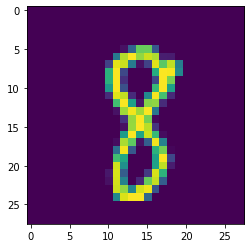

tensor(8, grad_fn=<NotImplemented>)


In [39]:
import matplotlib.pyplot as plt
index_batch = 7
plt.imshow(X[index_batch].view(28,28))
plt.show()
print(torch.argmax(net(X[index_batch].view(-1,28*28))[0]))